## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('german_credit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [4]:
print('Shape:', data.shape)

Shape: (1000, 21)


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
print('Has nulls:', any(data.isnull().sum()))
data.isnull().sum()

Has nulls: False


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [6]:
# Это поможет сделать вывод.
for col in data:
    values = data[col].unique()
    print(f'Column "{col}", type {data[col].dtype}, unique count {len(values)}, example:\n',
          '\n'.join(list(map(str, values))[:10]), sep='')
    print()
    # status: порядковый
    # duration: количественный
    # credit_history: категориальный
    # purpose: категориальный
    # amount: количественный
    # savings: порядковый
    # employment_duration: порядковый
    # installment_rate: порядковый
    # personal_status_sex: категорильный
    # other_debtors: категориальныйй
    # present_residence:  порядковый
    # property: категориальный
    # age: количественный
    # other_installment_plans: категориальный
    # housing: порядковый
    # number_credits: порядковый
    # job: категориальный
    # people_liable: бинарный
    # telephone: бинарный
    # foreign_worker: бинарный
    # credit_risk: бинарный



Column "status", type object, unique count 4, example:
no checking account
... < 0 DM
... >= 200 DM / salary for at least 1 year
0<= ... < 200 DM

Column "duration", type int64, unique count 33, example:
18
9
12
10
8
6
24
11
30
48

Column "credit_history", type object, unique count 5, example:
all credits at this bank paid back duly
no credits taken/all credits paid back duly
existing credits paid back duly till now
delay in paying off in the past
critical account/other credits elsewhere

Column "purpose", type object, unique count 10, example:
car (used)
others
retraining
furniture/equipment
car (new)
business
domestic appliances
radio/television
repairs
vacation

Column "amount", type int64, unique count 923, example:
1049
2799
841
2122
2171
2241
3398
1361
1098
3758

Column "savings", type object, unique count 5, example:
unknown/no savings account
... <  100 DM
100 <= ... <  500 DM
... >= 1000 DM
500 <= ... < 1000 DM

Column "employment_duration", type object, unique count 5, exampl

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [8]:
less_30 = data[data['age'] < 30]
housing_30 = less_30.value_counts(['housing'])['rent']
print('Under 30:', housing_30 / len(less_30) * 100, '%')

more_40 = data[data['age'] > 40]
housing_40 = more_40.value_counts(['housing'])['rent']
print('Older 40:', housing_40 / len(more_40) * 100, '%')

Under 30: 66.66666666666666 %
Older 40: 68.01470588235294 %


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [9]:
foreigners = data[data['foreign_worker'] == 'yes']
print(len(foreigners[(foreigners['number_credits'] != '1') & (foreigners['number_credits'] != '2-3')]))

1


### Задание 6 (1 балл)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)
plt.grid()
plt.plot(x, y_sin, label='y=sin(x)')
plt.plot(x, y_cos, '--m', label='y=cos(x)')
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

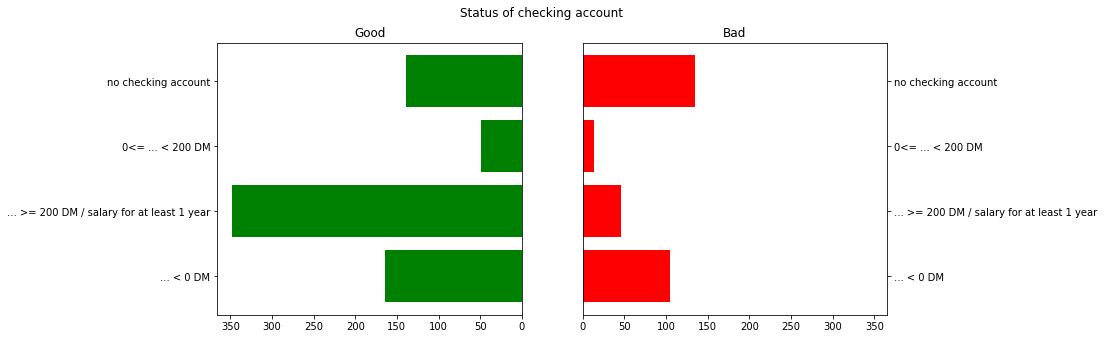

In [11]:
good = data[data['credit_risk'] == 'good'].groupby('status')['credit_risk'].count()
bad = data[data['credit_risk'] == 'bad'].groupby('status')['credit_risk'].count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Status of checking account')

y_pos1 = np.arange(len(good))
ax1.set_yticks(y_pos1, good.index)
ax1.barh(y_pos1, good, color='g')
ax1.invert_xaxis()
ax1.set_title('Good')

y_pos2 = np.arange(len(bad))
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_yticks(y_pos2, bad.index)
ax2.barh(y_pos2, bad, color='r')

ax2.set_xlim([ax1.get_xlim()[1], ax1.get_xlim()[0]])

ax2.set_title('Bad')
plt.show()

### Задание 8  (0.5 балла)

In [12]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

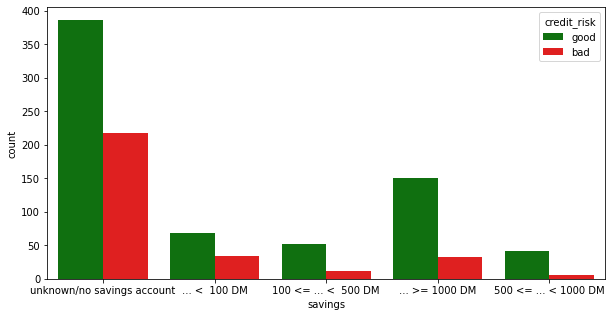

In [13]:
palette = ["g", "r"]
plt.figure(figsize=(10, 5))
sns.countplot(x='savings', hue='credit_risk', data=data, palette=palette)
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

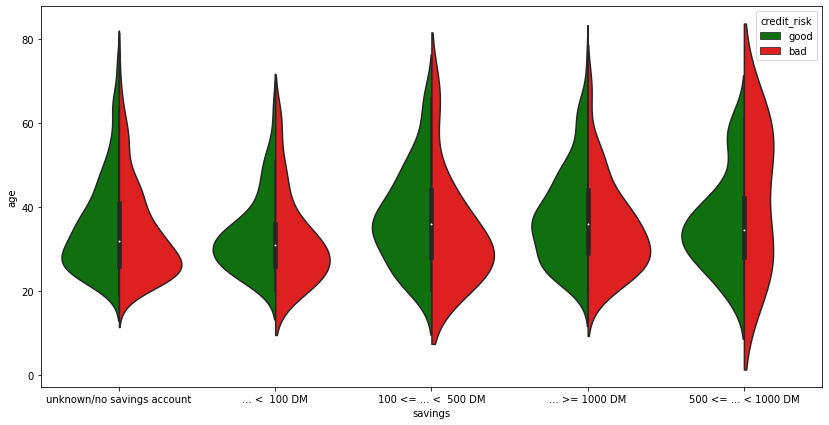

In [14]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=palette, split=True)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

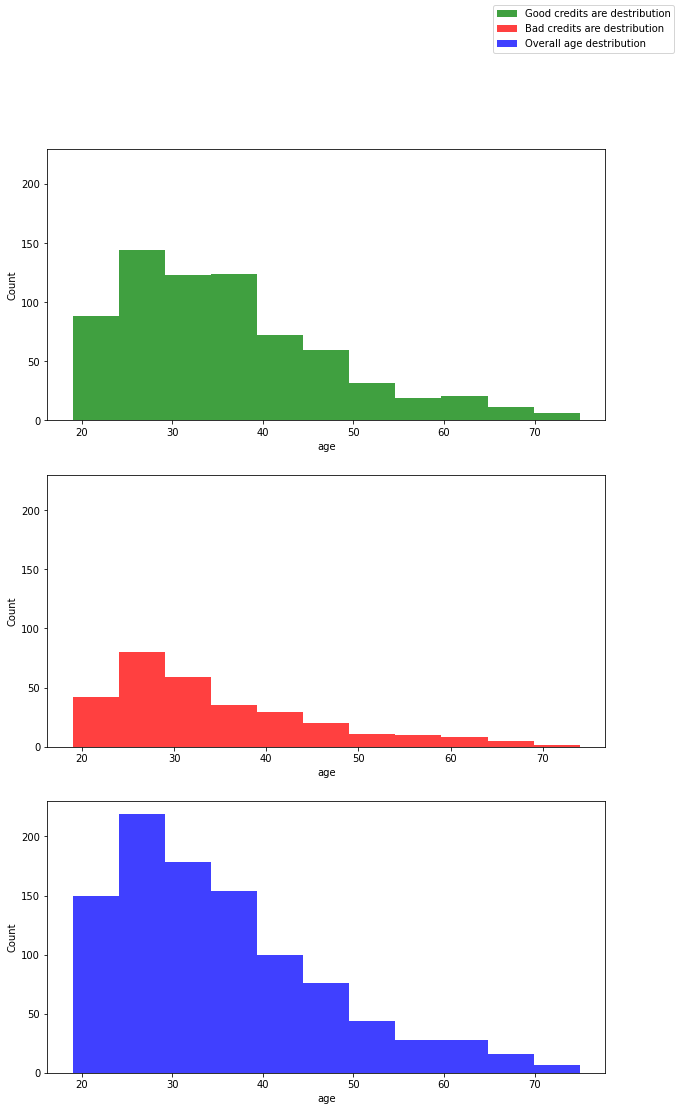

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 17), sharey='all')
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

sns.histplot(ax=ax1, data=good, x='age', color='green', bins=11, linewidth=0, label='Good credits are destribution')
sns.histplot(ax=ax2, data=bad, x='age', color='red', bins=11, linewidth=0, label='Bad credits are destribution')
sns.histplot(ax=ax3, data=data, x='age', color='blue', bins=11, linewidth=0, label='Overall age destribution')

fig.legend()

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

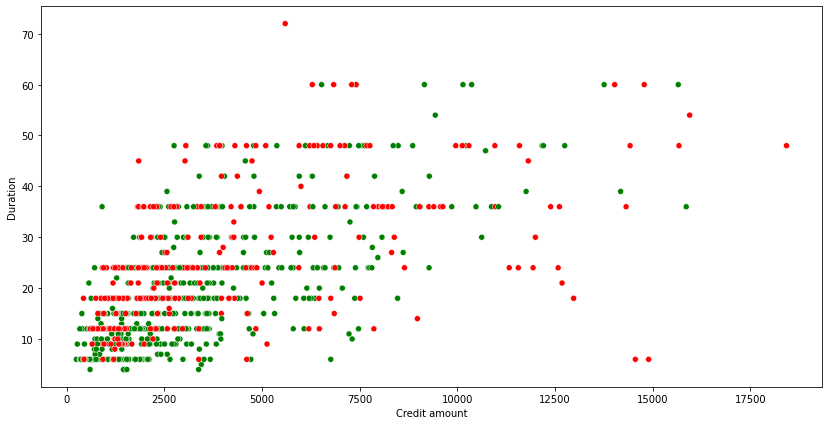

In [16]:
plt.figure(figsize=(14, 7))
ax = sns.scatterplot(data=data, x='amount', hue='credit_risk', y='duration', palette=palette, legend=False)
ax.set(xlabel='Credit amount', ylabel='Duration')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

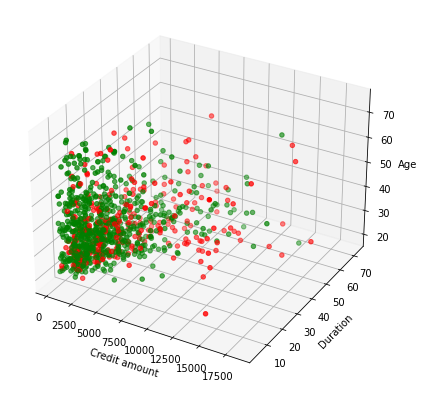

In [17]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

x = data['amount']
y = data['duration']
z = data['age']

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

ax.scatter(x, y, z, c=['r' if x == 'bad' else 'g' for x in data['credit_risk']])
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [18]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [19]:
for col in data:
    values = data[col].unique()
    print(f'Column "{col}", type {data[col].dtype}, unique count {len(values)}, example:\n',
          '\n'.join(list(map(str, values))[:10]), sep='')
    print()

Column "status", type object, unique count 4, example:
no checking account
... < 0 DM
... >= 200 DM / salary for at least 1 year
0<= ... < 200 DM

Column "duration", type int64, unique count 33, example:
18
9
12
10
8
6
24
11
30
48

Column "credit_history", type object, unique count 5, example:
all credits at this bank paid back duly
no credits taken/all credits paid back duly
existing credits paid back duly till now
delay in paying off in the past
critical account/other credits elsewhere

Column "purpose", type object, unique count 10, example:
car (used)
others
retraining
furniture/equipment
car (new)
business
domestic appliances
radio/television
repairs
vacation

Column "amount", type int64, unique count 923, example:
1049
2799
841
2122
2171
2241
3398
1361
1098
3758

Column "savings", type object, unique count 5, example:
unknown/no savings account
... <  100 DM
100 <= ... <  500 DM
... >= 1000 DM
500 <= ... < 1000 DM

Column "employment_duration", type object, unique count 5, exampl

In [20]:
# Решение.

data['status'] = data['status'].map({
    'no checking account': 0,
    '... < 0 DM': 1,
    '0<= ... < 200 DM': 2,
    '... >= 200 DM / salary for at least 1 year': 3,
})

data['savings'] = data['savings'].map({
    'unknown/no savings account': 0,
    '... <  100 DM': 1,
    '100 <= ... <  500 DM': 2,
    '500 <= ... < 1000 DM': 3,
    '... >= 1000 DM': 4,
})

data['employment_duration'] = data['employment_duration'].map({
    'unemployed': 0,
    '< 1 yr': 1,
    '1 <= ... < 4 yrs': 2,
    '4 <= ... < 7 yrs': 3,
    '>= 7 yrs': 3,
})

data['installment_rate'] = data['installment_rate'].map({
    '< 20': 0,
    '20 <= ... < 25': 1,
    '25 <= ... < 35': 2,
    '>= 35': 3,
})

data['present_residence'] = data['present_residence'].map({
    '< 1 yr': 0,
    '1 <= ... < 4 yrs': 1,
    '4 <= ... < 7 yrs': 2,
    '>= 7 yrs': 3,
})

data['number_credits'] = data['number_credits'].map({
    '1': 0,
    '2-3': 1,
    '4-5': 2,
    '>= 6': 3,
})

data['people_liable'] = data['people_liable'].map({
    '0 to 2': 0,
    '3 or more': 1,
})

data['telephone'] = data['telephone'].map({
    'no': 0,
    'yes (under customer name)': 1,
})

data['foreign_worker'] = data['foreign_worker'].map({
    'no': 0,
    'yes': 1,
})

data['credit_risk'] = data['credit_risk'].map({
    'bad': 0,
    'good': 1,
})

In [21]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,all credits at this bank paid back duly,car (used),1049,0,1,0,female : non-single or male : single,none,...,car or other,21,none,for free,0,skilled employee/official,0,0,0,1
1,0,9,all credits at this bank paid back duly,others,2799,0,2,2,male : married/widowed,none,...,unknown / no property,36,none,for free,1,skilled employee/official,1,0,0,1
2,1,12,no credits taken/all credits paid back duly,retraining,841,1,3,2,female : non-single or male : single,none,...,unknown / no property,23,none,for free,0,unskilled - resident,0,0,0,1
3,0,12,all credits at this bank paid back duly,others,2122,0,2,1,male : married/widowed,none,...,unknown / no property,39,none,for free,1,unskilled - resident,1,0,1,1
4,0,12,all credits at this bank paid back duly,others,2171,0,2,0,male : married/widowed,none,...,car or other,38,bank,rent,1,unskilled - resident,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,no credits taken/all credits paid back duly,furniture/equipment,1987,0,2,2,male : married/widowed,none,...,unknown / no property,21,none,for free,0,unskilled - resident,1,0,0,0
996,0,24,no credits taken/all credits paid back duly,others,2303,0,3,0,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,0,skilled employee/official,0,0,0,0
997,3,21,all credits at this bank paid back duly,others,12680,4,3,0,male : married/widowed,none,...,real estate,30,none,own,0,manager/self-empl./highly qualif. employee,0,1,0,0
998,1,12,no credits taken/all credits paid back duly,furniture/equipment,6468,4,0,2,male : married/widowed,none,...,real estate,52,none,rent,0,manager/self-empl./highly qualif. employee,0,1,0,0


In [22]:
to_del = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
          'housing', 'job']
for col in to_del:
    data.pop(col)

In [23]:
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,0,0,0,1
1,0,9,2799,0,2,2,1,36,1,1,0,0,1
2,1,12,841,1,3,2,3,23,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,0,1,1
4,0,12,2171,0,2,0,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,2,3,21,0,1,0,0,0
996,0,24,2303,0,3,0,0,45,0,0,0,0,0
997,3,21,12680,4,3,0,3,30,0,0,1,0,0
998,1,12,6468,4,0,2,0,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [24]:
def predict(Xtest: np.array) -> np.array:
    # print(Xtest)

    def solve(x):
        if x[1] < 18:
            return True
        if x[0] < 1:
            return False
        if x[2] > 6000:
            return True
        if x[3] >= 4:
            return True
        if x[0] > 1 or x[7] >= 32 and x[8] <= 2:
            return True

        return False

    return np.array([1 if solve(x) else 0 for x in Xtest])


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

good = len(list(filter(lambda x: x == 1, y_train)))
bad = len(list(filter(lambda x: x == 0, y_train)))
# print(good)
# print(bad)


objects = [(x, y) for x, y in zip(X_train, y_train)]
# for x in objects:
#     print(x[0][0], x[1])

# print(len(list(filter(lambda x: x[0][0] <= 1 and x[1] == 1, objects))) / good)

res = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print(res.shape)

# for x, y in zip(X_train, y_train):
#     print(x, y)
print(predict(X_test).shape)
accuracy_score(y_test, predict(X_test))


(12,)
(250,)


C:\Users\dm1tr\AppData\Local\Temp\ipykernel_1548\3404344124.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.704

In [25]:
# Ради интереса заюзал k ближайших соседей.

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(20)
model.fit(X_train, y_train)
pred_knn = model.predict(X_test)
accuracy_score(y_test, pred_knn)

0.636